# Dados de vendas de produtos
Ajude a empresa a encontrar tendências e insights

- Q1- Total de vendas unitárias do produto 1 
- Q2- Total de vendas unitárias do produto 2 
- Q3- Total de vendas unitárias do produto 3
- Q4- Total de vendas unitárias do produto 4 

- S1- Receita total do produto 1
- S2- Receita total do produto 2
- S3- Receita total do produto 3
- S4- Receita total do produto 4

1) Existe alguma tendência nas vendas de todos os quatro produtos durante determinados meses?

2) De todos os quatro produtos, qual produto teve as maiores vendas em todos os anos determinados?

3) A empresa fecha todos os seus centros de varejo no dia 31 de dezembro de cada ano. Sr: Hariharan, o CEO, gostaria de obter uma estimativa do número de unidades de cada produto que poderiam ser vendidas em 31 de dezembro de cada ano, se todos os seus centros de varejo fossem mantidos abertos.

4) O CEO está considerando uma ideia para abandonar a produção de qualquer um dos produtos. Ele quer que você analise esses dados e sugira se sua ideia resultaria em um enorme revés para a empresa.

5) O CEO também gostaria de prever as vendas e receitas para o ano de 2024. Ele quer que você dê uma estimativa anual com a melhor precisão possível.

In [11]:
import pandas as pd # biblioteca usada para manipulação e análise de dados
import numpy as np
import matplotlib.pyplot as plt # biblioteca para plotagens e visualizações
import seaborn as sns # biblioteca para visualizações

# Você pode usar o código a seguir para exibir e armazenar gráficos Matplotlib em um bloco de anotações Python Jupyter:
%matplotlib inline

# Para ignorar avisos
import warnings
warnings.filterwarnings("ignore")

venda = pd.read_csv(r'..\DtScience\statsfinal.csv')
display(venda)

,Unnamed: 0,Date,Q-P1,Q-P2,Q-P3,Q-P4,S-P1,S-P2,S-P3,S-P4
0,0,13-06-2010,5422,3725,576,907,17187.74,23616.50,3121.92,6466.91
1,1,14-06-2010,7047,779,3578,1574,22338.99,4938.86,19392.76,11222.62
2,2,15-06-2010,1572,2082,595,1145,4983.24,13199.88,3224.90,8163.85
3,3,16-06-2010,5657,2399,3140,1672,17932.69,15209.66,17018.80,11921.36
4,4,17-06-2010,3668,3207,2184,708,11627.56,20332.38,11837.28,5048.04
...,...,...,...,...,...,...,...,...,...,...
4595,4595,30-01-2023,2476,3419,525,1359,7848.92,21676.46,2845.50,9689.67
4596,4596,31-01-2023,7446,841,4825,1311,23603.82,5331.94,26151.50,9347.43
4597,4597,01-02-2023,6289,3143,3588,474,19936.13,19926.62,19446.96,3379.62
4598,4598,02-02-2023,3122,1188,5899,517,9896.74,7531.92,31972.58,3686.21


In [12]:
venda.head(3) # ver as 5 ou quantas linhas quisermos 

,Unnamed: 0,Date,Q-P1,Q-P2,Q-P3,Q-P4,S-P1,S-P2,S-P3,S-P4
0,0,13-06-2010,5422,3725,576,907,17187.74,23616.50,3121.92,6466.91
1,1,14-06-2010,7047,779,3578,1574,22338.99,4938.86,19392.76,11222.62
2,2,15-06-2010,1572,2082,595,1145,4983.24,13199.88,3224.90,8163.85


In [13]:
venda.tail(3) # ver as 5 ou quantas linhas quisermos  

,Unnamed: 0,Date,Q-P1,Q-P2,Q-P3,Q-P4,S-P1,S-P2,S-P3,S-P4
4597,4597,01-02-2023,6289,3143,3588,474,19936.13,19926.62,19446.96,3379.62
4598,4598,02-02-2023,3122,1188,5899,517,9896.74,7531.92,31972.58,3686.21
4599,4599,03-02-2023,1234,3854,2321,406,3911.78,24434.36,12579.82,2894.78


In [14]:
venda = venda.drop("Unnamed: 0", axis=1) # Exclui a COLUNA "Unnamed: 0"
display(venda)

,Date,Q-P1,Q-P2,Q-P3,Q-P4,S-P1,S-P2,S-P3,S-P4
0,13-06-2010,5422,3725,576,907,17187.74,23616.50,3121.92,6466.91
1,14-06-2010,7047,779,3578,1574,22338.99,4938.86,19392.76,11222.62
2,15-06-2010,1572,2082,595,1145,4983.24,13199.88,3224.90,8163.85
3,16-06-2010,5657,2399,3140,1672,17932.69,15209.66,17018.80,11921.36
4,17-06-2010,3668,3207,2184,708,11627.56,20332.38,11837.28,5048.04
...,...,...,...,...,...,...,...,...,...
4595,30-01-2023,2476,3419,525,1359,7848.92,21676.46,2845.50,9689.67
4596,31-01-2023,7446,841,4825,1311,23603.82,5331.94,26151.50,9347.43
4597,01-02-2023,6289,3143,3588,474,19936.13,19926.62,19446.96,3379.62
4598,02-02-2023,3122,1188,5899,517,9896.74,7531.92,31972.58,3686.21


In [15]:
venda.info() # Mostrando todas as informações da Tabela

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    4600 non-null   object 
 1   Q-P1    4600 non-null   int64  
 2   Q-P2    4600 non-null   int64  
 3   Q-P3    4600 non-null   int64  
 4   Q-P4    4600 non-null   int64  
 5   S-P1    4600 non-null   float64
 6   S-P2    4600 non-null   float64
 7   S-P3    4600 non-null   float64
 8   S-P4    4600 non-null   float64
dtypes: float64(4), int64(4), object(1)
memory usage: 323.6+ KB


- De todos os quatro produtos, qual produto teve as maiores vendas em todos os anos determinados?


In [16]:
tot_produto1 = venda["Q-P1"].sum() # Soma dos itens da coluna "Q-P1"
tot_produto2 = venda["Q-P2"].sum() # Soma dos itens da coluna "Q-P2"
tot_produto3 = venda["Q-P3"].sum() # Soma dos itens da coluna "Q-P3"
tot_produto4 = venda["Q-P4"].sum() # Soma dos itens da coluna "Q-P4"

print(f'O total de vendas do produtos1 é de {tot_produto1}')
print(f'O total de vendas do produtos2 é de {tot_produto2}')
print(f'O total de vendas do produtos3 é de {tot_produto3}')
print(f'O total de vendas do produtos4 é de {tot_produto4}')

print()

valores = [tot_produto1, tot_produto2, tot_produto3, tot_produto4]
novo = sorted(valores, reverse=True)
print(novo)

O total de vendas do produtos1 é de 18960506
O total de vendas do produtos2 é de 9799295
O total de vendas do produtos3 é de 14470404
O total de vendas do produtos4 é de 5168100

[18960506, 14470404, 9799295, 5168100]


In [17]:
venda.describe() #Verificando as informações estatisticas

,Q-P1,Q-P2,Q-P3,Q-P4,S-P1,S-P2,S-P3,S-P4
count,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,4121.849130,2130.281522,3145.740000,1123.500000,13066.261743,13505.984848,17049.910800,8010.555000
std,2244.271323,1089.783705,1671.832231,497.385676,7114.340094,6909.228687,9061.330694,3546.359869
min,254.000000,251.000000,250.000000,250.000000,805.180000,1591.340000,1355.000000,1782.500000
25%,2150.500000,1167.750000,1695.750000,696.000000,6817.085000,7403.535000,9190.965000,4962.480000
50%,4137.000000,2134.000000,3202.500000,1136.500000,13114.290000,13529.560000,17357.550000,8103.245000
75%,6072.000000,3070.250000,4569.000000,1544.000000,19248.240000,19465.385000,24763.980000,11008.720000
max,7998.000000,3998.000000,6000.000000,2000.000000,25353.660000,25347.320000,32520.000000,14260.000000


### Extraia o ano da coluna 'Dia' 'Mês' 'ano' da coluna 'Data' usando uma função lambda

- Precisamos obter o ano dos dados para analisar as vendas ano a ano
- Criamos novas colunas com a Variável e Colchetes:

    variavel['Day']

- Que vai ser igual a coluna que queremos pegar os dados:

    venda['Day'] = venda['Date']

- Usando o apply vai trabalhar em uma coluna da nossa tabela: ( venda['Date'] ) que vai passar por todas as datas aplicando uma função que vamos definir. Para isso vamos usar uma função lambda que é criada em uma linha.

- venda['Date'].apply(lambda x: x.split('-')[0])

    - O split('-') da função lambda vai pegar os dados da coluna ['Date'] e vai separar cada dado por ('-') que vai virar uma lista com cada dado tendo seu index:
        
        - index [0] vai pegar o dia 
        - index [1] vai pegar o mês
        - index [2] vai pegar o ano


In [18]:

venda['Day'] = venda['Date'].apply(lambda x: x.split('-')[0])
venda['Month'] = venda['Date'].apply(lambda x: x.split('-')[1])
venda['Year'] = venda['Date'].apply(lambda x: x.split('-')[2])
venda

,Date,Q-P1,Q-P2,Q-P3,Q-P4,S-P1,S-P2,S-P3,S-P4,Day,Month,Year
0,13-06-2010,5422,3725,576,907,17187.74,23616.50,3121.92,6466.91,13,06,2010
1,14-06-2010,7047,779,3578,1574,22338.99,4938.86,19392.76,11222.62,14,06,2010
2,15-06-2010,1572,2082,595,1145,4983.24,13199.88,3224.90,8163.85,15,06,2010
3,16-06-2010,5657,2399,3140,1672,17932.69,15209.66,17018.80,11921.36,16,06,2010
4,17-06-2010,3668,3207,2184,708,11627.56,20332.38,11837.28,5048.04,17,06,2010
...,...,...,...,...,...,...,...,...,...,...,...,...
4595,30-01-2023,2476,3419,525,1359,7848.92,21676.46,2845.50,9689.67,30,01,2023
4596,31-01-2023,7446,841,4825,1311,23603.82,5331.94,26151.50,9347.43,31,01,2023
4597,01-02-2023,6289,3143,3588,474,19936.13,19926.62,19446.96,3379.62,01,02,2023
4598,02-02-2023,3122,1188,5899,517,9896.74,7531.92,31972.58,3686.21,02,02,2023


### Vamos descartar linhas para os anos de 2010 e 2023

In [19]:
data = venda.query("Year != '2010' and Year != '2023'")
data

,Date,Q-P1,Q-P2,Q-P3,Q-P4,S-P1,S-P2,S-P3,S-P4,Day,Month,Year
201,01-01-2011,281,3956,4186,1537,890.77,25081.04,22688.12,10958.81,01,01,2011
202,02-01-2011,7665,1350,4266,1789,24298.05,8559.00,23121.72,12755.57,02,01,2011
203,03-01-2011,937,3758,4311,314,2970.29,23825.72,23365.62,2238.82,03,01,2011
204,04-01-2011,6378,968,4530,995,20218.26,6137.12,24552.60,7094.35,04,01,2011
205,05-01-2011,731,2174,5908,1505,2317.27,13783.16,32021.36,10730.65,05,01,2011
...,...,...,...,...,...,...,...,...,...,...,...,...
4561,26-12-2022,7600,662,4510,988,24092.00,4197.08,24444.20,7044.44,26,12,2022
4562,27-12-2022,7114,2948,681,700,22551.38,18690.32,3691.02,4991.00,27,12,2022
4563,28-12-2022,7759,356,1834,1142,24596.03,2257.04,9940.28,8142.46,28,12,2022
4564,29-12-2022,6457,1851,3369,669,20468.69,11735.34,18259.98,4769.97,29,12,2022


### Faça um gráfico de nossa unidade TOTAL E MÉDIA vendida para cada produto usando um histograma

def plot_bar_chart(df, columns, stri, str1, val):
    
    if val == 'sum':

        vendas_por_ano = df.groupby('Year')[columns].sum().reset_index()

O "df" que usarmos vai agrupar por ano (groupby('Year')) as colunas que colocarmos na nossa função 'plot_bar_chart' e vai somar tudo ('.sum()') separando por anos, o '.reset_index()' ele ajusta a nossa tabela para um modelo de fac´l compreenção.

In [20]:
vendas_por_ano = data.groupby("Year")[['Q-P1', 'Q-P2', 'Q-P3', 'Q-P4']].sum().reset_index()
display(vendas_por_ano)

,Year,Q-P1,Q-P2,Q-P3,Q-P4
0,2011,1435633,751692,1160897,412322
1,2012,1508611,769797,1144590,417920
2,2013,1533099,754526,1116114,405394
3,2014,1572144,789069,1162719,403748
4,2015,1484197,767964,1112136,413251
5,2016,1517603,783892,1112698,408415
6,2017,1469715,808843,1166668,419020
7,2018,1531419,751252,1152070,398550
8,2019,1482623,785373,1135262,410425
9,2020,1498357,778322,1175277,419854


## pd.melt()

Operação que derrete os dados, uma operação que permite converter colunas em linhas.

#### Parâmetros:

    - frame: O Dataframe que vamos mexer.
    - id_vars: Variáveis da tabela que queremos manter
    - value_vars: Variáveis que vamos transformar, ele vai pegar todos os valores e vai separar em uma linha e as variáveis que usarmos em outra linha.
    - var_name: Nome que vamos dar a linha CHEIA DE VARIÁVEIS QUE COLOCAMOS EM "value_vars".
    - value_name: Nome que vamos dar aos VALORES SEPARADOS EM "value_vars".

In [21]:
pd.melt(
        vendas_por_ano, id_vars="Year", value_vars=['Q-P1', 'Q-P2', 'Q-P3', 'Q-P4'], var_name='Produtos', value_name='Vendas')

,Year,Produtos,Vendas
0,2011,Q-P1,1435633
1,2012,Q-P1,1508611
2,2013,Q-P1,1533099
3,2014,Q-P1,1572144
4,2015,Q-P1,1484197
5,2016,Q-P1,1517603
6,2017,Q-P1,1469715
7,2018,Q-P1,1531419
8,2019,Q-P1,1482623
9,2020,Q-P1,1498357


In [22]:
#Crie uma função que nos permita traçar um gráfico de barras para os 4 produtos
def plot_bar_chart(df, columns, stri, str1, val):
    # Vendas agregadas para cada produto por ano, por soma ou média
    if val == 'sum':
        vendas_por_ano = df.groupby('Year')[columns].sum().reset_index() #groupby = agrupar por ...
    elif val == 'mean':
        vendas_por_ano = df.groupby('Year')[columns].mean().reset_index() #groupby = agrupar por ...

    # Derreta os dados para facilitar a plotagem
    vendas_por_ano = pd.melt(
        vendas_por_ano, id_vars='Year', value_vars=columns, var_name='Produtos', value_name='Vendas')

    # Cria um gráfico de barras
    plt.figure(figsize=(20,5))
    sns.barplot(data=vendas_por_ano, x='Year', y='Vendas', hue='Produtos') #,palette="cividis")
    plt.xlabel('Year')
    plt.ylabel(stri)
    plt.title(f'{stri} by {str1}')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

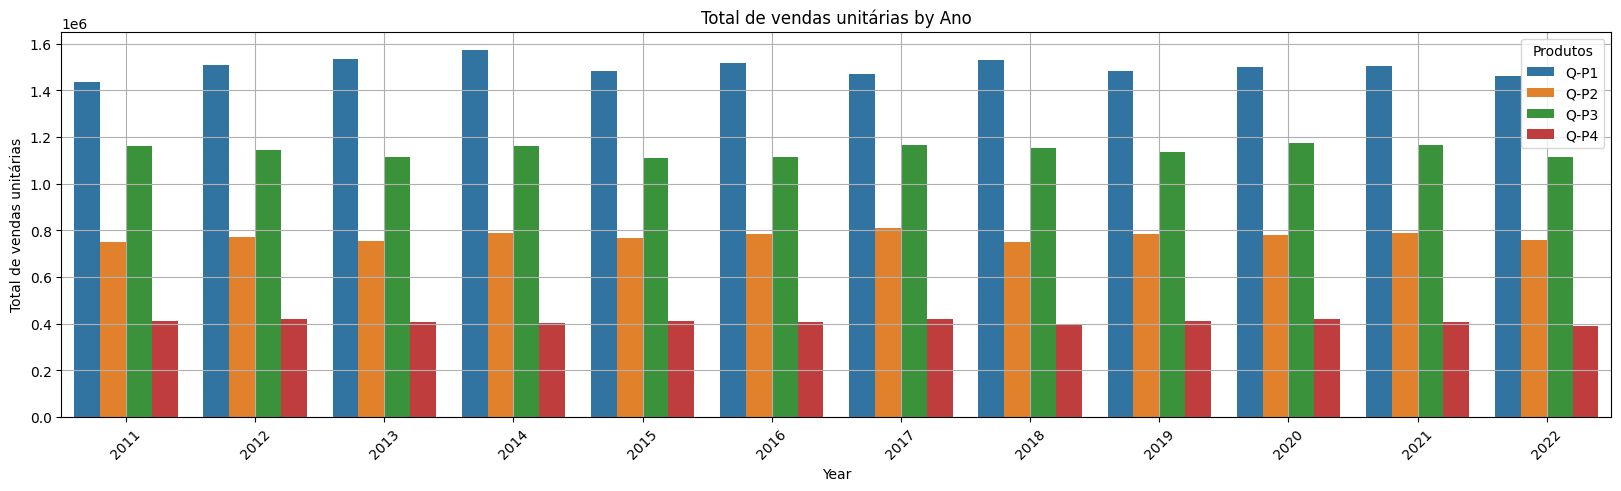

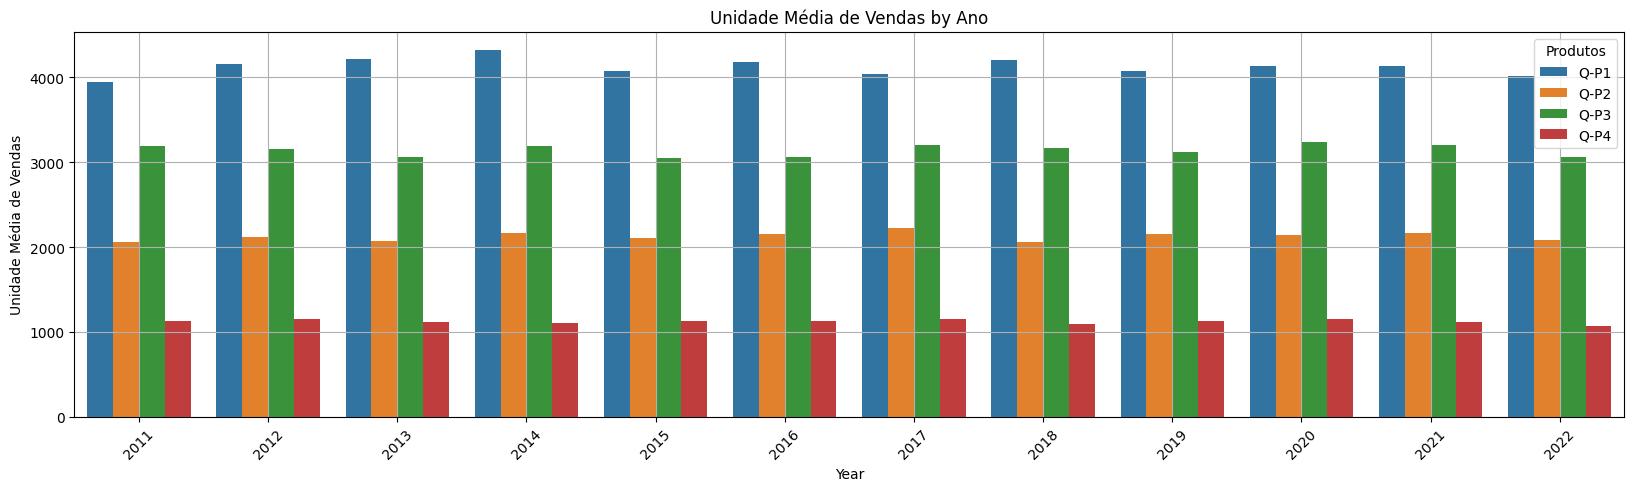

In [23]:
# Use a função plot_bar_chart, insira as colunas Unit Sales e a string Unit Sales

plot_bar_chart(data, ['Q-P1', 'Q-P2', 'Q-P3', 'Q-P4'],'Total de vendas unitárias', 'Ano', 'sum')

plot_bar_chart(data, ['Q-P1', 'Q-P2', 'Q-P3', 'Q-P4'],'Unidade Média de Vendas', 'Ano', 'mean')

Observação

- Podemos observar que P1 tem as maiores vendas unitárias de cada ano. E é mais alto é no ano de 2014.
- Podemos observar que P4 tem a menor venda unitária de todos os produtos.

Observação

- Confira este link para mais paletas
- A média e a soma oferecem visualização de dados muito semelhante e podem ser usadas para entender os dados.

### Faça um gráfico de nossa receita TOTAL E PRINCIPAL de vendas para cada produto usando um histograma.

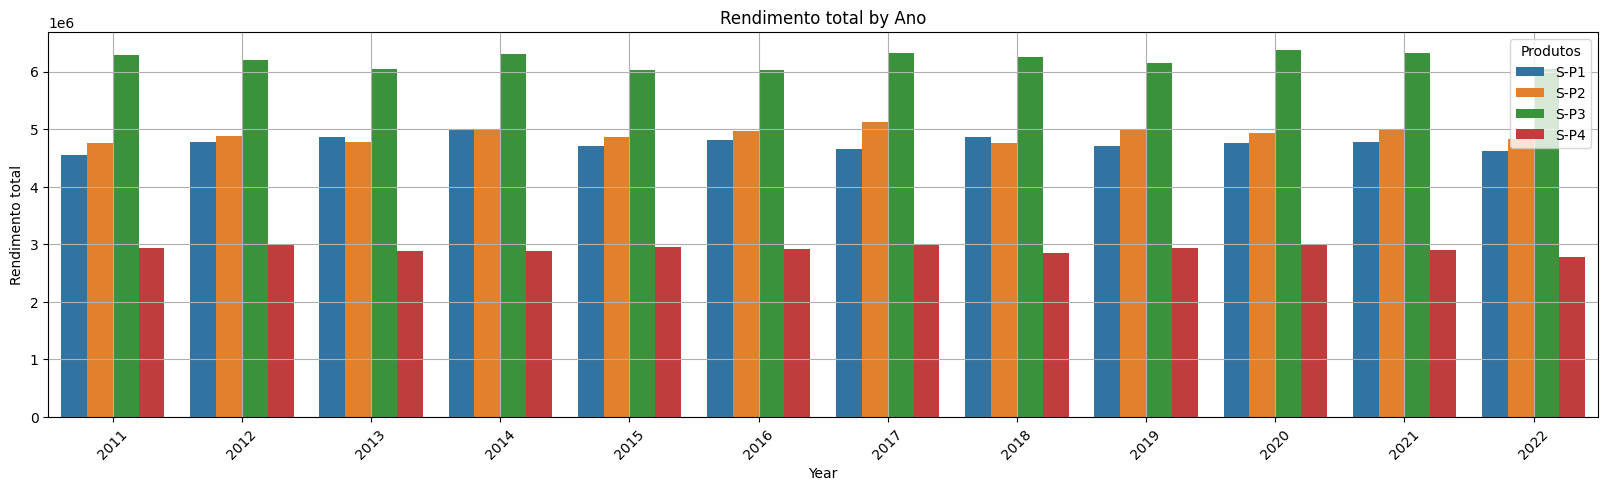

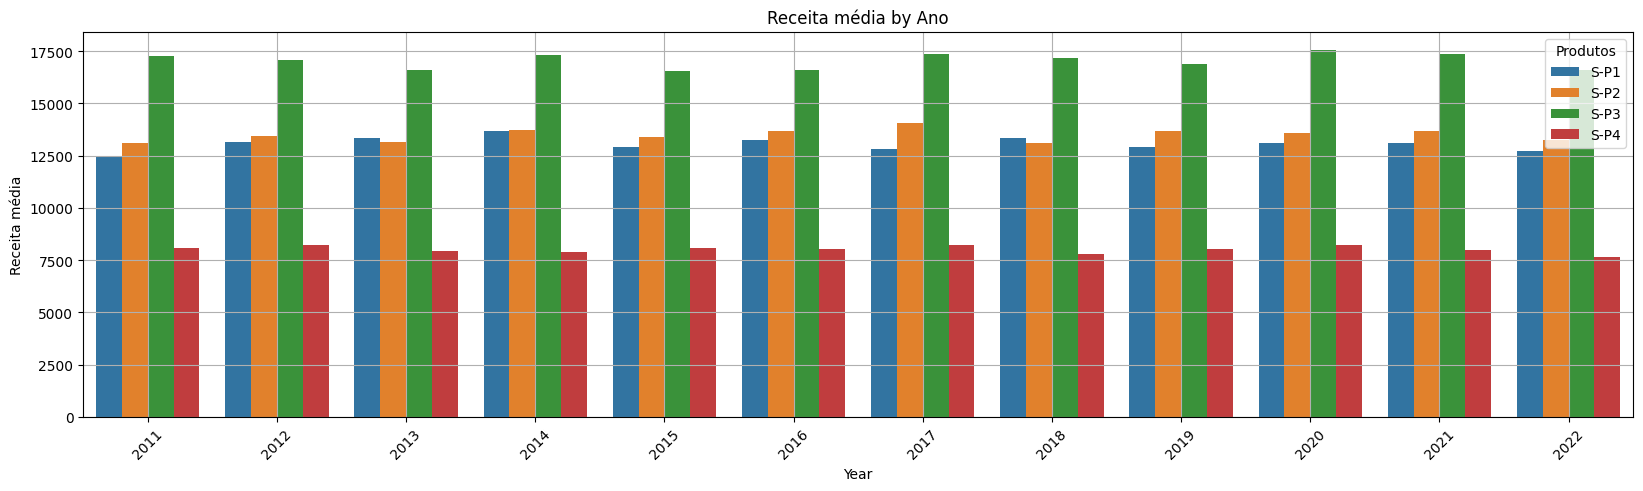

In [24]:
#use a função plot_bar_chart, insira as Colunas de Receita total e a string de Receita

plot_bar_chart(data, ['S-P1', 'S-P2', 'S-P3', 'S-P4'], 'Rendimento total', 'Ano', 'sum')

plot_bar_chart(data, ['S-P1', 'S-P2', 'S-P3', 'S-P4'], 'Receita média', 'Ano', 'mean')

Observação

- Podemos observar que P3 trouxe a maior receita. Isso pode ser resultado de várias coisas:
    - O P3 foi vendido por um preço mais alto do que o restante, pois teve a segunda maior unidade vendida em cada ano.

    ###    

- Podemos observar que P1 E P2 trouxeram receitas semelhantes para cada ano. Com P2 trazendo um pouco mais.
    - A P1 apesar de ter a maior unidade vendida, trouxe a segunda menor receita a cada ano.

In [25]:
venda

,Date,Q-P1,Q-P2,Q-P3,Q-P4,S-P1,S-P2,S-P3,S-P4,Day,Month,Year
0,13-06-2010,5422,3725,576,907,17187.74,23616.50,3121.92,6466.91,13,06,2010
1,14-06-2010,7047,779,3578,1574,22338.99,4938.86,19392.76,11222.62,14,06,2010
2,15-06-2010,1572,2082,595,1145,4983.24,13199.88,3224.90,8163.85,15,06,2010
3,16-06-2010,5657,2399,3140,1672,17932.69,15209.66,17018.80,11921.36,16,06,2010
4,17-06-2010,3668,3207,2184,708,11627.56,20332.38,11837.28,5048.04,17,06,2010
...,...,...,...,...,...,...,...,...,...,...,...,...
4595,30-01-2023,2476,3419,525,1359,7848.92,21676.46,2845.50,9689.67,30,01,2023
4596,31-01-2023,7446,841,4825,1311,23603.82,5331.94,26151.50,9347.43,31,01,2023
4597,01-02-2023,6289,3143,3588,474,19936.13,19926.62,19446.96,3379.62,01,02,2023
4598,02-02-2023,3122,1188,5899,517,9896.74,7531.92,31972.58,3686.21,02,02,2023


In [26]:
data.groupby('Month')[['Q-P1', 'Q-P2', 'Q-P3', 'Q-P4']].sum()

,Q-P1,Q-P2,Q-P3,Q-P4
Month,,,,
01,1523624,825689,1154182,415185
02,1405024,699493,1057576,367420
03,1506574,812963,1127503,418276
04,1514945,761336,1157296,410606
05,1504004,792094,1249675,409208
06,1524601,758334,1119747,400807
07,1569086,765296,1132366,423951
08,1489380,808367,1121974,405372
09,1399678,752893,1174812,415644


## Tendência nas vendas de todos os quatro produtos durante determinado mês

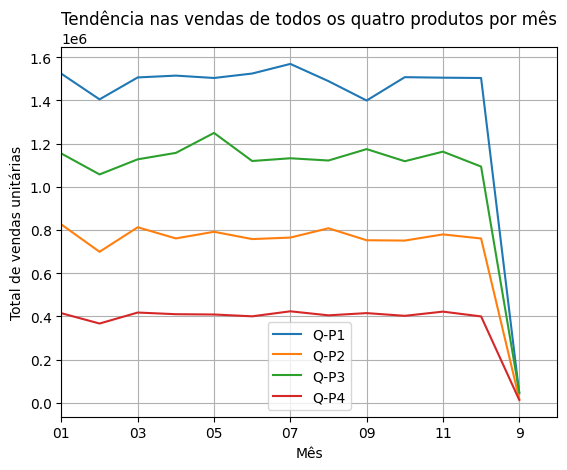

In [27]:
# Crie uma figura e um eixo
def mes_plot():
    fig, ax = plt.subplots()

    # Plote os dados de vendas de cada produto por mês
    data.groupby('Month')[['Q-P1', 'Q-P2', 'Q-P3', 'Q-P4']].sum().plot(ax=ax)

    # Defina os limites do eixo x para mostrar apenas até dezembro
    ax.set_xlim(left=0, right=13)

    # Defina os rótulos e o título do eixo
    ax.set_xlabel('Mês')
    ax.set_ylabel('Total de vendas unitárias')
    ax.set_title('Tendência nas vendas de todos os quatro produtos por mês')

    # Mostra o enredo
    plt.grid(True)
    plt.show()

mes_plot()

Observação

- Podemos observar que todos os produtos caem em fevereiro.

####
- Também aparece uma queda muito drástica após o 12º mês. O valor mostra 9, que deve fazer parte do mês 09. Precisamos renomear esta coluna para corresponder ao 09. Antes de fazer uma análise mais aprofundada.

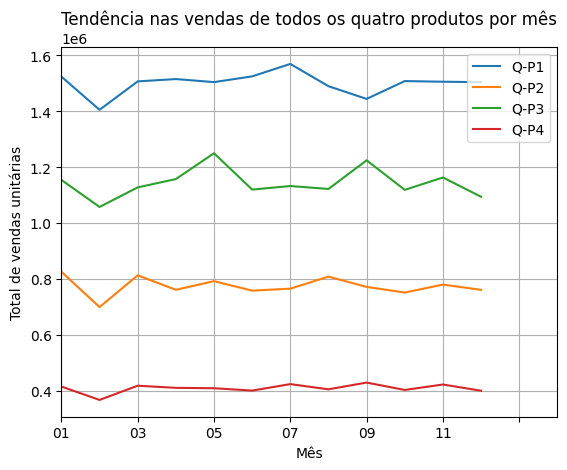

In [28]:
# Substitua todas as entradas de '9' na coluna Mês por '09'

data['Month'] = venda['Month'].replace('9', '09')

mes_plot()

### Estime para cada produto a unidade de vendas que poderia ser vendida no dia 31 de dezembro, se todos os seus pontos de venda fossem mantidos abertos.

In [29]:
#obtenha o 31º dia de cada mês de cada ano. Obs: nem todo mês tem 31 dias

def mes_31_dez(df, months):
    m31_data = df[df['Month'].isin(months) & (df['Day'] == '31')]
    return m31_data

_31mes = mes_31_dez(data, ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12'])
_31mes

,Date,Q-P1,Q-P2,Q-P3,Q-P4,S-P1,S-P2,S-P3,S-P4,Day,Month,Year
231,31-01-2011,939,3325,1863,1612,2976.63,21080.50,10097.46,11493.56,31,01,2011
290,31-03-2011,464,2220,421,1663,1470.88,14074.80,2281.82,11857.19,31,03,2011
351,31-05-2011,1507,2980,3816,1202,4777.19,18893.20,20682.72,8570.26,31,05,2011
412,31-07-2011,4336,744,4717,667,13745.12,4716.96,25566.14,4755.71,31,07,2011
442,31-08-2011,4548,1484,1596,1974,14417.16,9408.56,8650.32,14074.62,31,08,2011
...,...,...,...,...,...,...,...,...,...,...,...,...
4352,31-05-2022,3669,2710,3067,1593,11630.73,17181.40,16623.14,11358.09,31,05,2022
4413,31-07-2022,1437,833,1867,1270,4555.29,5281.22,10119.14,9055.10,31,07,2022
4443,31-08-2022,1035,1639,3658,841,3280.95,10391.26,19826.36,5996.33,31,08,2022
4474,31-9-2022,6964,1873,5481,1336,22075.88,11874.82,29707.02,9525.68,31,09,2022


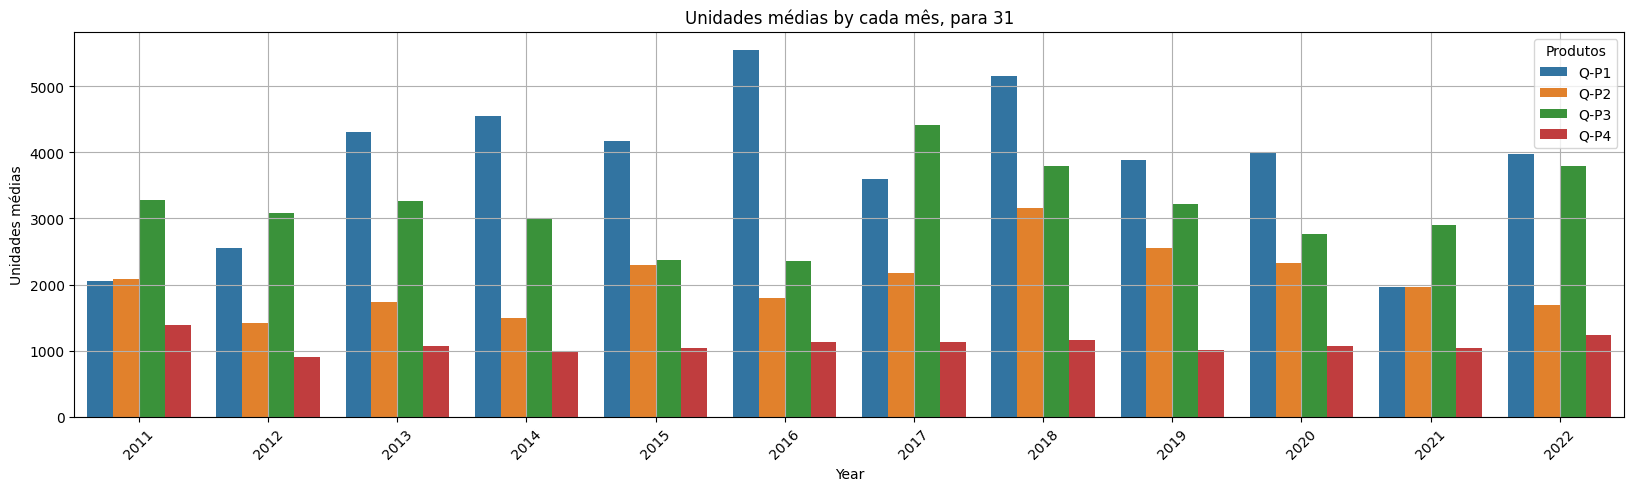

In [30]:
plot_bar_chart(_31mes, ['Q-P1', 'Q-P2', 'Q-P3', 'Q-P4'], 'Unidades médias', 'cada mês, para 31', 'mean')

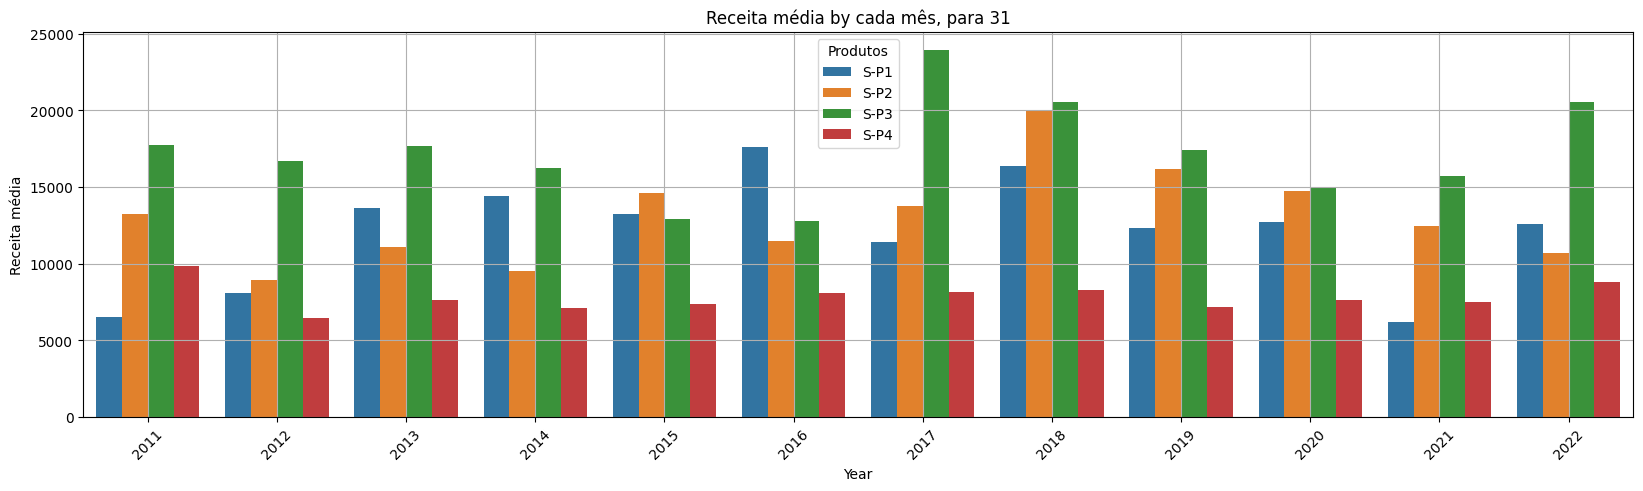

In [31]:
plot_bar_chart(_31mes, ['S-P1', 'S-P2', 'S-P3', 'S-P4'], 'Receita média', 'cada mês, para 31', 'mean')

Observação

- No geral, podemos ver que P1 tem as vendas unitárias mais altas no dia 31 de cada ano, exceto em 2021 e 2022. (Isso pode ser resultado da Covid e de outros problemas econômicos.)

- P3 tem a segunda maior unidade de vendas para todos os 31 em cada ano.

In [32]:
# nos dá a média de todos os 31 dias em todos os anos para cada produto
def avg_on_31st(df, product):
    df_31 = df[df['Day'] == '31']
    avg_sales = df_31[product].mean()
    return avg_sales

In [33]:
# Média de vendas unitárias dos dias 31

avg_on_31st(data, ['Q-P1', 'Q-P2', 'Q-P3', 'Q-P4']).round(2)

Q-P1    3813.74
Q-P2    2058.80
Q-P3    3183.88
Q-P4    1098.61
dtype: float64

In [34]:
# Média de receita dos dias 31

avg_on_31st(data, ['S-P1', 'S-P2', 'S-P3', 'S-P4']).round(2)

S-P1    12089.55
S-P2    13052.78
S-P3    17256.63
S-P4     7833.07
dtype: float64

Observação

- Podemos ver que nossa observação anterior correlata como Q-P1 tem a estimativa mais alta, seguida por Q-P3
Podemos estimar que a empresa fará:

- Q-P1: 3813,74;
- Q-P2: 2058,80;
- Q-P3: 3183.88;
- Q-P4: 1098,61;

## Conclusão

- Vendas unitárias 2011 - 2022

    - P1 tem as vendas unitárias mais altas para cada ano. E é mais alto é no ano de 2014.

    - Podemos observar que P4 tem a menor venda unitária de todos os produtos.  
##

- Receitas 2011 - 2022

    - Podemos observar que o P3 trouxe a maior receita. Isso pode ser resultado de várias coisas:
        . O P3 foi vendido por um preço mais alto do que o restante, pois teve a segunda maior unidade vendida em cada ano.

    - Podemos observar que P1 e P2 trouxeram receitas semelhantes para cada ano. Com P2 trazendo um pouco mais.

    - P1 apesar de ter a maior unidade vendida, trouxe a segunda menor receita a cada ano.
##

- Média de vendas mensais 2011 - 2022

    - Podemos observar que todas as vendas unitárias de Produtos caem em fevereiro.
    - Podemos observar que fevereiro e dezembro têm as menores vendas de cada produto
    - Para P1, podemos observar Mar - Jul tendo as maiores vendas unitárias
    - Para P2, podemos observar janeiro, março e agosto com as vendas unitárias mais altas
    - Para P3, podemos observar maio e setembro com as vendas unitárias mais altas
    - Para P4, podemos observar vendas uniformes de janeiro a dezembro
##

- Vendas unitárias estimadas para 31 de dezembro

    .Este valor não pode ser estimado corretamente sem Machine Learning. Atualmente, usamos a média de todos os 31 dias em todos os anos para cada produto.

    - No geral, podemos ver que P1 tem as vendas unitárias mais altas no dia 31 de cada ano, exceto em 2021. (Isso pode ser resultado da Covid e de outros problemas econômicos.)
    - P3 tem a segunda maior unidade de vendas para todos os 31 em cada ano, tendo superado P1 em 2011, 2012, 2017(maior venda do P3) e 2021.
    - Podemos ver que nossa observação anterior correlata como Q-P1 tem a estimativa mais alta, seguida por Q-P3
    - Podemos estimar que a empresa fará:      
        - Q-P1: 3813,74
        - Q-P2: 2058,80
        - Q-P3: 3183.88
        - Q-P4: 1098,61